__Hoja de trabajo Proyecto BMW - Esther__

In [882]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px


1. Importar dataset

In [883]:
df_bmw = pd.read_csv('dataset/bmw_pricing_v3.csv')

In [884]:
df_bmw.sample(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2777,BMW,535,130111.0,230.0,2013-11-01,diesel,blue,sedan,True,True,False,True,False,False,True,True,29600.0,2018-04-01
299,BMW,316,194410.0,85.0,NaN,diesel,black,estate,False,True,False,False,True,False,True,True,8400.0,2018-01-01
2065,BMW,320,134600.0,125.0,NaN,petrol,white,hatchback,False,False,True,NaN,False,False,False,False,14900.0,2018-04-01
3676,BMW,116,13022.0,85.0,NaN,diesel,brown,subcompact,False,True,False,NaN,False,False,True,False,13800.0,2018-03-01
3978,NaN,X5,203928.0,210.0,NaN,diesel,blue,suv,True,NaN,True,NaN,True,True,True,True,15400.0,2018-03-01


In [885]:
df_bmw.shape

(4843, 18)

In [886]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

Primeros comentarios:
1. Varias columnas con nulos
2. Solo el campo 'gps' es tipo booleano, en cambio campos como volante_regulable, aire_acondicionado, camara_trasera...alerta_lim_velocidad son 'objects' a pesar de tener valores 'True/False' 

2. Análisis duplicados: vemos que no hay duplicados

In [887]:
df_bmw[df_bmw.duplicated()].shape

(0, 18)

3. Análisis nulos. Casi todos los campos tienen nulos... pero hay un grupo de 7 campos con muchos y otros con muy pocos registros. Los analizo por separado.

In [888]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

3.1. Analizamos los campos con más nulos: marca, fecha_registro, color, tipo_coche, aire_acondicionado, asientos_traseros_plegables, bluetooth y alerta_lim_velocidad

3.1.1. MARCA: vemos que solo tiene dos valores 'BMW' y 'nan'. Por lo tanto como no aporta información, la borramos (haciendo una copia antes)


In [889]:
df_bmw['marca'].unique()

array([nan, 'BMW'], dtype=object)

In [890]:
df_bmw1 =  df_bmw.copy()

In [891]:
del(df_bmw1['marca'])

In [892]:
df_bmw1.isnull().sum()

modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [893]:
df_bmw1.shape

(4843, 17)

3.1.2. FECHA REGISTO: columna con demasiados nulos (50,03%). La eliminamos.

In [894]:
df_bmw1['fecha_registro'].value_counts(dropna = False, normalize = True) * 100

fecha_registro
NaN           50.030973
2013-07-01     1.920297
2014-03-01     1.713814
2014-05-01     1.672517
2013-01-01     1.610572
2013-10-01     1.589924
2014-02-01     1.527979
2013-06-01     1.383440
2014-01-01     1.383440
2013-02-01     1.383440
2013-11-01     1.259550
2012-10-01     1.259550
2013-04-01     1.218253
2014-04-01     1.197605
2013-09-01     1.197605
2013-03-01     1.197605
2013-08-01     1.115011
2012-06-01     1.115011
2014-07-01     1.115011
2014-09-01     1.011770
2013-05-01     0.949824
2014-08-01     0.929176
2012-11-01     0.887879
2012-03-01     0.867231
2014-06-01     0.846583
2013-12-01     0.825934
2012-01-01     0.722693
2014-10-01     0.722693
2014-11-01     0.702044
2012-04-01     0.702044
2012-07-01     0.681396
2012-09-01     0.660747
2012-08-01     0.598802
2015-03-01     0.578154
2012-05-01     0.557506
2012-12-01     0.536857
2012-02-01     0.392319
2015-06-01     0.392319
2015-10-01     0.392319
2015-01-01     0.371670
2015-05-01     0.371670
2

In [895]:
df_bmw2 =  df_bmw1.copy()

In [896]:
del(df_bmw2['fecha_registro'])

In [897]:
df_bmw2.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

3.1.3. COLOR: Muchos nulos (9,1%), pero no creo que se deba borrar la columna por contener información relevante. Les asigno el valor 'sin info color' ya que por la distribución tampoco puedo hacer asignaciones manuales.

In [898]:
df_bmw2['color'].value_counts(dropna = False, normalize = True) * 100

color
black     30.951889
grey      22.093744
blue      13.359488
white      9.993805
NaN        9.188520
brown      6.235804
silver     6.029321
red        0.970473
beige      0.763989
green      0.289077
orange     0.123890
Name: proportion, dtype: float64

In [899]:
pd.set_option('display.max_rows', None)

In [900]:
df_bmw2.groupby(['modelo', 'color'], dropna = False)['modelo'].count()

modelo             color 
 Active Tourer     black       1
114                black       5
                   blue        1
                   brown       2
                   grey        2
                   silver      1
                   white       2
                   NaN         2
116                black     118
                   blue       70
                   brown      16
                   grey       66
                   orange      1
                   red         3
                   silver     15
                   white      41
                   NaN        28
118                black      43
                   blue       26
                   brown       1
                   green       1
                   grey       38
                   red         1
                   silver      4
                   white      13
                   NaN        16
120                black       7
                   blue        8
                   grey        5
                 

In [901]:
df_bmw3 = df_bmw2.copy()

In [902]:
df_bmw3['color'].fillna('sin info color', inplace=True)

In [903]:
df_bmw3.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

3.1.4. TIPO_COCHE: Muchos nulos (30,1%), pero no creo que se deba borrar la columna por contener información relevante. Analizo si puedo hacer asignación manual del tipo_coche por el modelo, pero hay mucha variabilidad. Les asigno el valor 'sin info tipo_coche'.

In [904]:
df_bmw3['tipo_coche'].value_counts(dropna = False, normalize = True) * 100

tipo_coche
NaN            30.146603
estate         22.857733
sedan          16.952302
suv            15.589511
hatchback      10.076399
subcompact      1.589924
coupe           1.569275
convertible     0.619451
van             0.598802
Name: proportion, dtype: float64

In [905]:
df_bmw3.groupby(['modelo', 'tipo_coche'], dropna = False)['modelo'].count()

modelo             tipo_coche 
 Active Tourer     van              1
114                hatchback        6
                   subcompact       4
                   NaN              5
116                estate           2
                   hatchback      191
                   sedan            3
                   subcompact      56
                   NaN            106
118                convertible      1
                   coupe            2
                   hatchback       79
                   sedan            3
                   subcompact      13
                   NaN             45
120                convertible      4
                   hatchback       16
                   sedan            1
                   subcompact       2
                   NaN             13
123                hatchback        1
                   NaN              1
125                hatchback        5
135                convertible      1
                   coupe            1
                   

In [906]:
df_bmw3['tipo_coche'].fillna('sin info tipo_coche', inplace=True)

3.1.5. AIRE_ACONDICIONADO: Varios nulos (10,0%), pero no creo que se deba borrar la columna por contener información relevante. Les asigno el valor 'sin info aire_acondicionado'.

In [907]:
df_bmw3['aire_acondicionado'].value_counts(dropna = False, normalize = True) * 100

aire_acondicionado
True     71.546562
False    18.418336
NaN      10.035102
Name: proportion, dtype: float64

In [908]:
df_bmw3['aire_acondicionado'].fillna('sin info aire_acondicionado', inplace=True)

3.1.6. ASIENTOS_PLEGABLES: Columna no relevante con muchos nulos (70,0%). La elimino.

In [909]:
df_bmw3['asientos_traseros_plegables'].value_counts(dropna = False, normalize = True) * 100

asientos_traseros_plegables
NaN      70.018584
False    23.745612
True      6.235804
Name: proportion, dtype: float64

In [910]:
df_bmw4 = df_bmw3.copy()

In [911]:
del(df_bmw4['asientos_traseros_plegables'])

3.1.7. BLUETOOTH: Varios nulos (15,0%), pero no creo que se deba borrar la columna por contener información relevante. Les asigno el valor 'sin info bluetooth'.

In [912]:
df_bmw4['bluetooth'].value_counts(dropna = False, normalize = True) * 100

bluetooth
False    64.402230
True     20.565765
NaN      15.032005
Name: proportion, dtype: float64

In [913]:
df_bmw4['bluetooth'].fillna('sin info bluetooth', inplace=True)

3.1.8. ALERTA_LIM_VELOCIDAD: Varios nulos (15,0%), pero no creo que se deba borrar la columna por contener información relevante. Les asigno el valor 'sin info alerta_lim_velocidad'.

In [914]:
df_bmw4['alerta_lim_velocidad'].value_counts(dropna = False, normalize = True) * 100

alerta_lim_velocidad
True     46.252323
False    38.715672
NaN      15.032005
Name: proportion, dtype: float64

In [915]:
df_bmw4['alerta_lim_velocidad'].fillna('sin info alerta_lim_velocidad', inplace=True)

In [916]:
df_bmw4.isnull().sum()

modelo                  3
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

In [917]:
df_bmw4.isnull().shape

(4843, 15)

3.2. Analizamos las categorías con muy pocos nulos: modelo, km, potencia, tipo_gasolina, volante_regulable, camara_trasera, elevalunas_electrico, precio, fecha_venta.
Primero borro las filas con precio, modelo, km o potencia nulos por considerar que no podría hacer asignación manual. Y analizo posteriormente el resto.

In [918]:
df_bmw4.dropna(subset = ['precio', 'modelo','km', 'potencia'], inplace=True)

In [919]:
col_few_nulls = ['tipo_gasolina', 'volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'fecha_venta']

In [920]:
num_rows_nulls = len(df_bmw4[df_bmw4['modelo'].isnull() | df_bmw4['km'].isnull() | df_bmw4['tipo_gasolina'].isnull() | df_bmw4['volante_regulable'].isnull() | df_bmw4['camara_trasera'].isnull() | df_bmw4['elevalunas_electrico'].isnull() | df_bmw4['fecha_venta'].isnull()]) 
print(num_rows_nulls)
print(num_rows_nulls / df_bmw4.shape[0] * 100)

14
0.2897950734837508


In [921]:
df_num_rows_nulls = df_bmw4[df_bmw4['modelo'].isnull() | df_bmw4['km'].isnull() | df_bmw4['tipo_gasolina'].isnull() | df_bmw4['volante_regulable'].isnull() | df_bmw4['camara_trasera'].isnull() | df_bmw4['elevalunas_electrico'].isnull() | df_bmw4['precio'].isnull() | df_bmw4['fecha_venta'].isnull()] 
df_num_rows_nulls

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
63,640,69695.0,230.0,diesel,sin info color,coupe,True,True,False,NaN,True,True,True,36300.0,2018-02-01
66,320,93066.0,135.0,diesel,black,coupe,NaN,False,False,True,False,True,sin info alerta_lim_velocidad,11900.0,2018-06-01
82,420,54993.0,135.0,NaN,black,sin info tipo_coche,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,NaN,white,estate,False,False,False,False,False,False,True,2400.0,2018-04-01
273,318,195032.0,100.0,diesel,grey,sin info tipo_coche,NaN,sin info aire_acondicionado,False,False,False,True,False,4900.0,2018-01-01
291,520,163675.0,135.0,diesel,sin info color,estate,True,True,NaN,True,sin info bluetooth,True,True,14900.0,2018-01-01
305,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,2018-01-01
409,316,160619.0,85.0,diesel,black,estate,False,True,NaN,True,sin info bluetooth,True,sin info alerta_lim_velocidad,11700.0,2018-04-01
444,318,111622.0,100.0,NaN,black,estate,True,True,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,NaN,white,sin info tipo_coche,False,True,False,False,False,True,False,10200.0,2018-02-01


Analizo si puedo asignar algún valor a 'tipo_gasolina' según el modelo

In [922]:
modelos_tipo_gasolina_na = df_bmw4['modelo'][df_bmw4['tipo_gasolina'].isna()]
df_bmw4[df_bmw4['modelo'].isin(modelos_tipo_gasolina_na)].groupby(['modelo','tipo_gasolina','tipo_coche'], dropna = False)[['modelo','precio']].agg({'modelo':'count', 'precio':'mean'})

modelo        precio
modelo tipo_gasolina tipo_coche                               
318    Diesel        estate                    1  15700.000000
       diesel        estate                  266  11001.127820
                     hatchback                 1   1000.000000
                     sedan                   107  11505.607477
                     sin info tipo_coche     176  11200.568182
                     subcompact                2   1950.000000
       petrol        convertible               3   2266.666667
                     estate                    3   6133.333333
                     sedan                     3   3166.666667
                     sin info tipo_coche       2   8600.000000
       NaN           estate                    2   7750.000000
                     sin info tipo_coche       1  10200.000000
320    Diesel        estate                    2  12250.000000
                     sin info tipo_coche       1   6500.000000
       diesel        convertible               4  14875.000000
                     coupe                    10   9590.000000
                     estate                  296  11633.108108
                     hatchback                13  13092.307692
                     sedan                   162  13133.950617
                     sin info tipo_coche     221  12619.457014
       petrol        coupe                     3   5500.000000
                     estate                    6  10133.333333
                     hatchback                 4  12525.000000
                     sedan                    17  11317.647059
                     sin info tipo_coche      10   9100.000000
       NaN           estate                    1   2400.000000
420    diesel        convertible               4  28600.000000
                     coupe                    22  22722.727273
                     hatchback                 1  13100.000000
                     sedan                     1  28100.000000
                     sin info tipo_coche      11  25954.545455
       petrol        coupe                     3  23733.333333
       NaN           sin info tipo_coche       1  18400.000000

No veo un patrón que me permita hacer asignación manual. Al ser sol 16 filas las que tienen alguno de estos campos a nulo, las elimino

In [923]:
df_bmw5 = df_bmw4.copy()
df_bmw5.shape

(4831, 15)

In [924]:
df_bmw5.dropna(subset = col_few_nulls, inplace=True)
df_bmw5.shape

(4817, 15)

In [925]:
df_bmw5.reset_index(drop=True, inplace=True)

In [926]:
df_bmw5.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

4. Análisis univariable

In [927]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   tipo_gasolina         4817 non-null   object 
 4   color                 4817 non-null   object 
 5   tipo_coche            4817 non-null   object 
 6   volante_regulable     4817 non-null   object 
 7   aire_acondicionado    4817 non-null   object 
 8   camara_trasera        4817 non-null   object 
 9   elevalunas_electrico  4817 non-null   object 
 10  bluetooth             4817 non-null   object 
 11  gps                   4817 non-null   bool   
 12  alerta_lim_velocidad  4817 non-null   object 
 13  precio                4817 non-null   float64
 14  fecha_venta           4817 non-null   object 
dtypes: bool(1), float64(3

In [928]:
for i in df_bmw5:
    print('\n',i,df_bmw5[i].unique(),'\n')


 modelo ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 


 km [140411.  13929. 183297. ...  19633.  27920. 195840.] 


 potencia [100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210. 122. 200.  90.
 150. 141. 173. 137. 280. 112. 189.  

Vamos a crear columnas de las varibles con valores True/False al tipo entero para que las considere boolenas:

In [929]:
col_booleans = ['volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'gps']

for i in col_booleans:
    df_bmw5[i+'_BOOL'] = df_bmw5[i].astype(int)

In [930]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4817 non-null   object 
 1   km                         4817 non-null   float64
 2   potencia                   4817 non-null   float64
 3   tipo_gasolina              4817 non-null   object 
 4   color                      4817 non-null   object 
 5   tipo_coche                 4817 non-null   object 
 6   volante_regulable          4817 non-null   object 
 7   aire_acondicionado         4817 non-null   object 
 8   camara_trasera             4817 non-null   object 
 9   elevalunas_electrico       4817 non-null   object 
 10  bluetooth                  4817 non-null   object 
 11  gps                        4817 non-null   bool   
 12  alerta_lim_velocidad       4817 non-null   object 
 13  precio                     4817 non-null   float

In [931]:
df_bmw6 = df_bmw5.copy()

In [932]:
for i in col_booleans:
    del(df_bmw6[i])

In [933]:
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4817 non-null   object 
 1   km                         4817 non-null   float64
 2   potencia                   4817 non-null   float64
 3   tipo_gasolina              4817 non-null   object 
 4   color                      4817 non-null   object 
 5   tipo_coche                 4817 non-null   object 
 6   aire_acondicionado         4817 non-null   object 
 7   bluetooth                  4817 non-null   object 
 8   alerta_lim_velocidad       4817 non-null   object 
 9   precio                     4817 non-null   float64
 10  fecha_venta                4817 non-null   object 
 11  volante_regulable_BOOL     4817 non-null   int32  
 12  camara_trasera_BOOL        4817 non-null   int32  
 13  elevalunas_electrico_BOOL  4817 non-null   int32

In [934]:
target= ["precio"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [935]:
lnum, lbool, lcat = obtener_lista_variables(df_bmw6)

In [936]:
print(len(df_bmw6.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(lcat), "variables categóricas")
print(len(lbool), "variables boolean")
print(len(lnum), "variables numéricas")

15 total de variables
1 variable a predecir
8 variables categóricas
4 variables boolean
2 variables numéricas


4.1. Analizar las variables numéricas

In [937]:
lnum

['km', 'potencia']

In [938]:
df_bmw6[['km','potencia']].describe()
#Observamos que el valor mínimo de 'km' es < 0 y que hay outliers más allá del 0.5e6. 
#En potencia parece que también habrá outlier por el valor máximo tan alejado de la media

,km,potencia
count,4.817000e+03,4817.000000
mean,1.409353e+05,128.984845
std,6.024268e+04,39.004876
min,-6.400000e+01,0.000000
25%,1.027580e+05,100.000000
50%,1.409910e+05,120.000000
75%,1.752350e+05,135.000000
max,1.000376e+06,423.000000


4.1.1. KM

[[<Axes: title={'center': 'km'}>]]


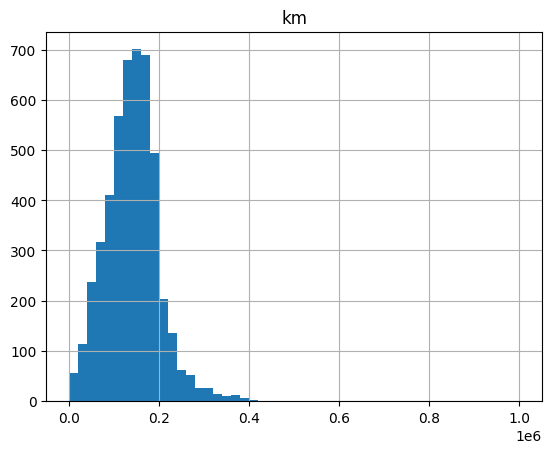

In [939]:
print(df_bmw6.hist('km', bins = 50))

In [940]:
df_bmw6['km'].describe()

count    4.817000e+03
mean     1.409353e+05
std      6.024268e+04
min     -6.400000e+01
25%      1.027580e+05
50%      1.409910e+05
75%      1.752350e+05
max      1.000376e+06
Name: km, dtype: float64

In [941]:
df_bmw6[(df_bmw6['km'] > 0.5e+06) | (df_bmw6['km'] < 0)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,aire_acondicionado,bluetooth,alerta_lim_velocidad,precio,fecha_venta,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL
2915,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,False,True,75000.0,2018-04-01,1,0,0,1
3709,118,1000376.0,90.0,diesel,sin info color,sin info tipo_coche,False,sin info bluetooth,False,1400.0,2018-06-01,1,0,0,1


In [942]:
df_bmw7 = df_bmw6.copy()

In [943]:
df_bmw7[(df_bmw7['km'] > 0.5e+06) | (df_bmw7['km'] < 0)].index

Index([2915, 3709], dtype='int64')

In [944]:
df_bmw7.drop(df_bmw7[(df_bmw7['km'] > 0.5e+06) | (df_bmw7['km'] < 0)].index, inplace=True)

[[<Axes: title={'center': 'km'}>]]


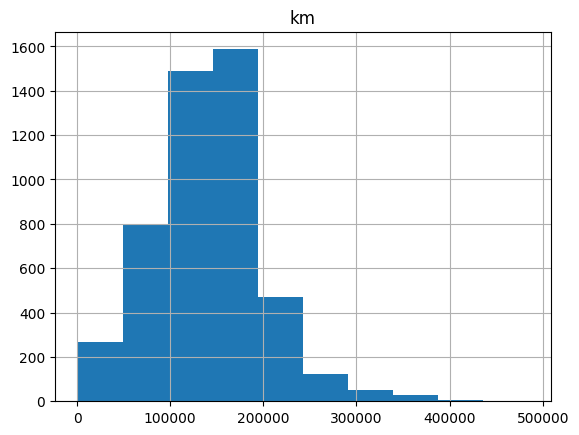

In [945]:
print(df_bmw7.hist('km'))

4.1.2. POTENCIA. Reviso los coches con potencia > 300 y considero que los que parecían outliers tienen sentido por el modelo de coche que es. Así que los mantengo

[[<Axes: title={'center': 'potencia'}>]]


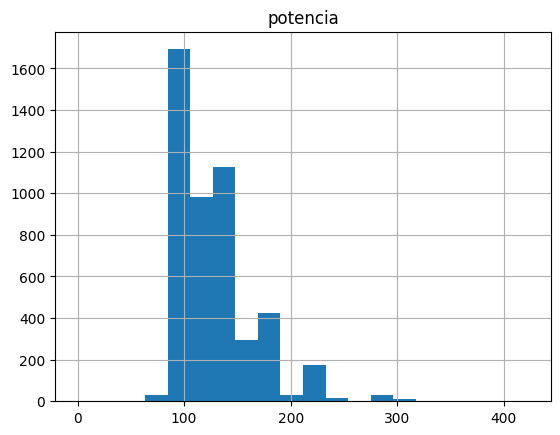

In [946]:
print(df_bmw7.hist('potencia', bins = 20))

In [947]:
df_bmw7[df_bmw7['potencia'] > 300]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,aire_acondicionado,bluetooth,alerta_lim_velocidad,precio,fecha_venta,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,True,69700.0,2018-02-01,1,0,0,1
65,M3,29925.0,309.0,petrol,silver,sin info tipo_coche,True,True,True,47000.0,2018-04-01,1,0,1,1
70,M4,69410.0,317.0,petrol,white,sin info tipo_coche,True,True,True,53600.0,2018-03-01,1,0,0,1
71,M3,170550.0,309.0,petrol,grey,coupe,True,False,True,28000.0,2018-03-01,1,0,1,1
90,M3,99283.0,309.0,petrol,silver,sin info tipo_coche,False,False,True,28600.0,2018-04-01,0,0,1,1
135,M3,169970.0,309.0,petrol,grey,coupe,True,False,True,35700.0,2018-08-01,1,0,1,1
2921,M3,33670.0,317.0,petrol,blue,sedan,True,True,True,51200.0,2018-04-01,1,0,0,1
3069,M3,39250.0,317.0,petrol,black,sedan,True,True,True,52400.0,2018-05-01,1,0,0,1
3578,M5,150187.0,412.0,petrol,white,sedan,True,True,True,41600.0,2018-09-01,1,1,1,1
4123,X6 M,2970.0,423.0,petrol,red,suv,sin info aire_acondicionado,False,True,82400.0,2018-04-01,1,1,0,1


In [948]:
df_bmw7.reset_index(drop=True, inplace=True)

4.2. Analizar las variables categóricas

In [949]:
lcat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta']

In [950]:
pd.set_option('display.max_rows', None)

In [951]:
for i in lcat:
    print(df_bmw7[i].value_counts(), '\n')

modelo
320                  747
520                  630
318                  562
X3                   437
116                  358
X1                   274
316                  233
X5                   231
525                  182
530                  157
118                  142
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   45
X6                    44
420                   42
120                   36
420 Gran Coupé        33
330                   33
730                   33
520 Gran Turismo      23
325                   19
740                   18
640 Gran Coupé        18
530 Gran Turismo      18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
218 Gran Tourer        9
X6 M                   8
418 Gran Coupé         8
640                    7
M3                     7
335                    7
435 Gran Coupé         6
Z4                

In [952]:
df_bmw8 = df_bmw7.copy()

4.2.1. MODELO: Vemos que hay muchos modelos que tienen una peso muy pequeño en el dataset. Decidimos borrar aquellos que tiene una representación < 1%. Pero antes los agrupamos sutituyendo los 'Gran Turismo', 'Gran Tourier', etc. por ''.

In [953]:
df_bmw8['modelo'].value_counts()

modelo
320                  747
520                  630
318                  562
X3                   437
116                  358
X1                   274
316                  233
X5                   231
525                  182
530                  157
118                  142
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   45
X6                    44
420                   42
120                   36
420 Gran Coupé        33
330                   33
730                   33
520 Gran Turismo      23
325                   19
740                   18
640 Gran Coupé        18
530 Gran Turismo      18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
218 Gran Tourer        9
X6 M                   8
418 Gran Coupé         8
640                    7
M3                     7
335                    7
435 Gran Coupé         6
Z4                

In [954]:
len(df_bmw8['modelo'].value_counts())

76

In [955]:
#función que crea una lista de los registros de un dataset que tienen cuyo value_counts es < un umbral definido
df_bmw8['modelo'] = df_bmw8['modelo'].str.replace(' Gran Turismo', '')
df_bmw8['modelo'] = df_bmw8['modelo'].str.replace(' Gran Coupé', '')
df_bmw8['modelo'] = df_bmw8['modelo'].str.replace(' Gran Tourer', '')
df_bmw8['modelo'] = df_bmw8['modelo'].str.replace(' Active Tourer', '')
df_bmw8['modelo'] = df_bmw8['modelo'].str.replace(' M', '')
df_bmw8['modelo'] = df_bmw8['modelo'].str.replace(' M 50', '')

In [956]:
df_bmw8['modelo'].value_counts()

modelo
320               820
318               659
520               653
X3                437
116               358
X1                274
X5                248
316               233
525               182
530               175
118               142
420                75
518                66
X6                 52
535                47
X4                 46
120                36
330                36
218                34
730                33
640                25
325                23
740                18
114                15
M550               12
435                10
335                10
418                 8
216                 8
M3                  7
Z4                  6
i3                  6
528                 6
430                 6
328                 5
125                 5
523                 4
220                 4
135                 4
X550                3
M235                3
225                 2
425                 2
750                 2
123                 2
650

In [957]:
len(df_bmw8['modelo'].value_counts())

56

In [958]:
df_bmw8['modelo'].value_counts(normalize=True)*100

modelo
320               17.030114
318               13.686397
520               13.561786
X3                 9.075805
116                7.435099
X1                 5.690550
X5                 5.150571
316                4.839045
525                3.779855
530                3.634476
118                2.949117
420                1.557632
518                1.370717
X6                 1.079958
535                0.976116
X4                 0.955348
120                0.747664
330                0.747664
218                0.706127
730                0.685358
640                0.519211
325                0.477674
740                0.373832
114                0.311526
M550               0.249221
435                0.207684
335                0.207684
418                0.166147
216                0.166147
M3                 0.145379
Z4                 0.124611
i3                 0.124611
528                0.124611
430                0.124611
328                0.103842
125          

In [959]:
#función que crea una lista de los registros de un dataset que tienen cuyo value_counts es < un umbral definido
def obten_lista_eliminar(dataset, columna, umbral):
  lista_borrar= []
  tabla=dataset[columna].value_counts().reset_index()
  for i in range(0,len(tabla)):
    if (tabla.iloc[i]['count']) < umbral:
      lista_borrar.append(tabla.iloc[i][columna])
  return lista_borrar

In [960]:
#función que elimina de un dataset los registros incluidos en la lista_eliminar
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)

In [961]:
lista_eliminar_tarifa = obten_lista_eliminar(df_bmw8, 'modelo', 66)
print(len(lista_eliminar_tarifa))

43


In [962]:
eliminar_lista_df(df_bmw8,'modelo',lista_eliminar_tarifa)

In [963]:
df_bmw8['modelo'].value_counts()

modelo
320    820
318    659
520    653
X3     437
116    358
X1     274
X5     248
316    233
525    182
530    175
118    142
420     75
518     66
Name: count, dtype: int64

In [964]:
df_bmw8.shape

(4322, 15)

4.2.2. TIPO_GASOLINA: agrupamos Diesel & diesel y eliminamos los 8 registros de hybrid_petro y electro por considerar que no son una muestra suficiente.

In [965]:
df_bmw8['tipo_gasolina'] = df_bmw8['tipo_gasolina'].str.lower()
df_bmw8.drop(df_bmw8[(df_bmw8['tipo_gasolina'].isin(['hybrid_petrol', 'electro']))].index, inplace=True)
df_bmw8['tipo_gasolina'].value_counts()

tipo_gasolina
diesel    4202
petrol     118
Name: count, dtype: int64

4.2.3. COLOR: no considero debo realizar ninguna acción

4.2.4. TIPO_COCHE: no considero debo realizar ninguna acción

4.2.5. AIRE_ACONDICIONADO: no considero debo realizar ninguna acción

4.2.6. ALERTA_CIM_VELOCIDAD: no considero debo realizar ninguna acción

4.2.7. BLUETOOTH: no considero debo realizar ninguna acción

4.2.8. FECHA_VENTA: La mayoría de valores son del 2018 y plantiamos eliminar los de años anteriores. Pero del 2018 solo hay registros de enero a septiembre. Por lo que decidimos borrar la columna.

In [966]:
df_bmw9 = df_bmw8.copy()

In [967]:
del(df_bmw9['fecha_venta'])

5. Análisis correlaciones: de las variable numéricas la 'potencia' es la variable más correlacionada positivamente y la siguiente son los 'km' pero la correlación es negativa.

In [968]:
corr = df_bmw9.corr(numeric_only=True)

In [969]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,precio,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL
km,1.000000,-0.000017,-0.405745,0.076731,0.012087,0.038822,0.162479
potencia,-0.000017,1.000000,0.610970,0.304490,0.279786,0.364997,-0.012047
precio,-0.405745,0.610970,1.000000,0.241063,0.222245,0.301105,-0.025203
volante_regulable_BOOL,0.076731,0.304490,0.241063,1.000000,0.241554,0.263643,0.233414
camara_trasera_BOOL,0.012087,0.279786,0.222245,0.241554,1.000000,0.185104,0.057376
elevalunas_electrico_BOOL,0.038822,0.364997,0.301105,0.263643,0.185104,1.000000,0.189557
gps_BOOL,0.162479,-0.012047,-0.025203,0.233414,0.057376,0.189557,1.000000


Al analizar el precio veo que hay outliers con un precios > 75.000 que voy a borrar

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

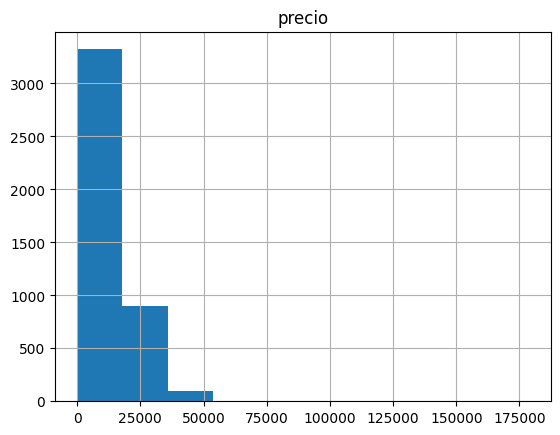

In [970]:
df_bmw9.hist("precio")

<Axes: xlabel='precio'>

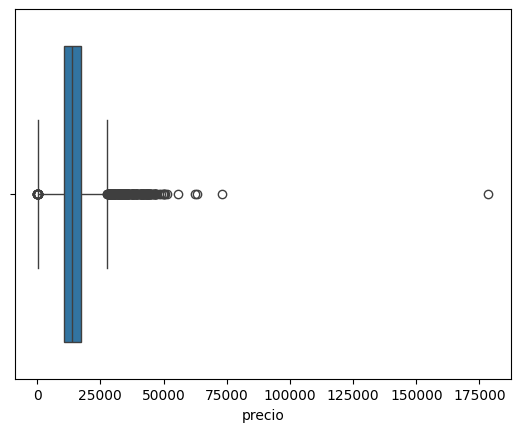

In [971]:
sns.boxplot(x=df_bmw9["precio"])

In [972]:
df_bmw9[df_bmw9['precio'] > 75000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,aire_acondicionado,bluetooth,alerta_lim_velocidad,precio,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL
4728,X3,72515.0,135.0,diesel,blue,suv,False,sin info bluetooth,True,178500.0,0,1,0,0


In [973]:
df_bmw9.drop(df_bmw9[df_bmw9['precio'] > 75000].index, inplace=True)

In [974]:
df_bmw9.reset_index(drop=True, inplace=True)

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

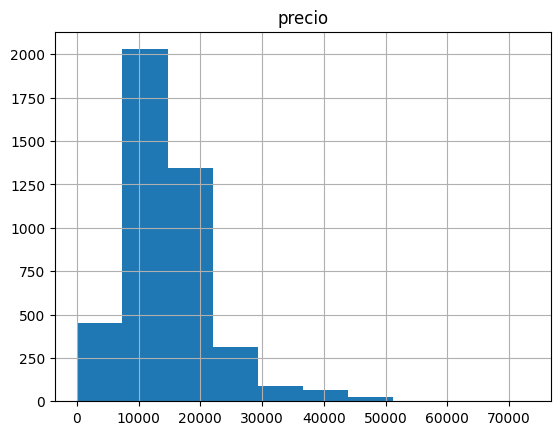

In [975]:
df_bmw9.hist("precio")

In [976]:
df_bmw9["log_precio"]=np.log10(df_bmw9["precio"])

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

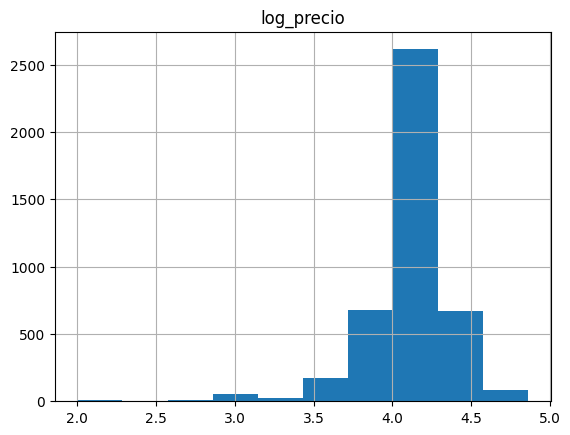

In [977]:
df_bmw9.hist("log_precio")

<Axes: xlabel='log_precio'>

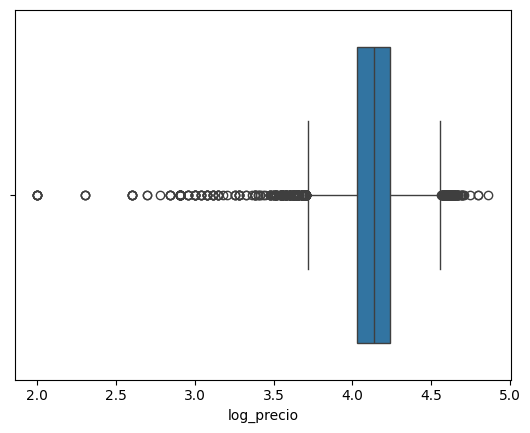

In [978]:
sns.boxplot(x=df_bmw9["log_precio"])

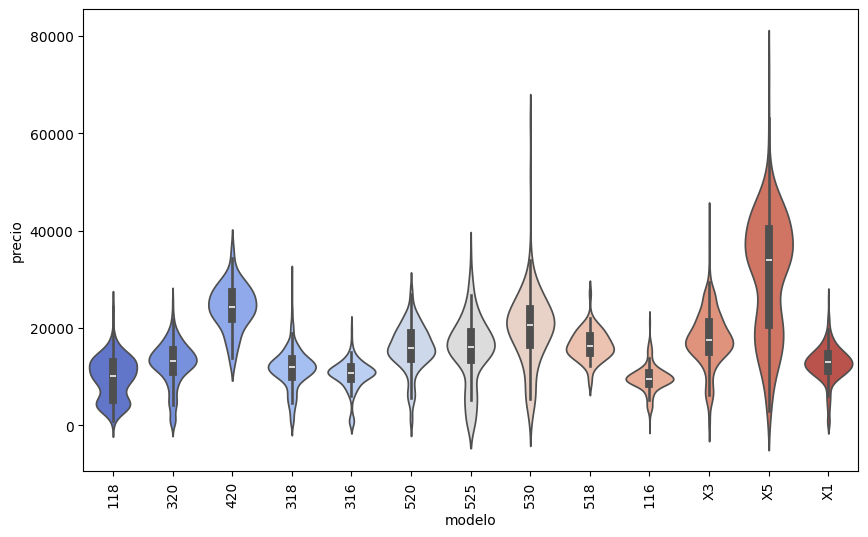

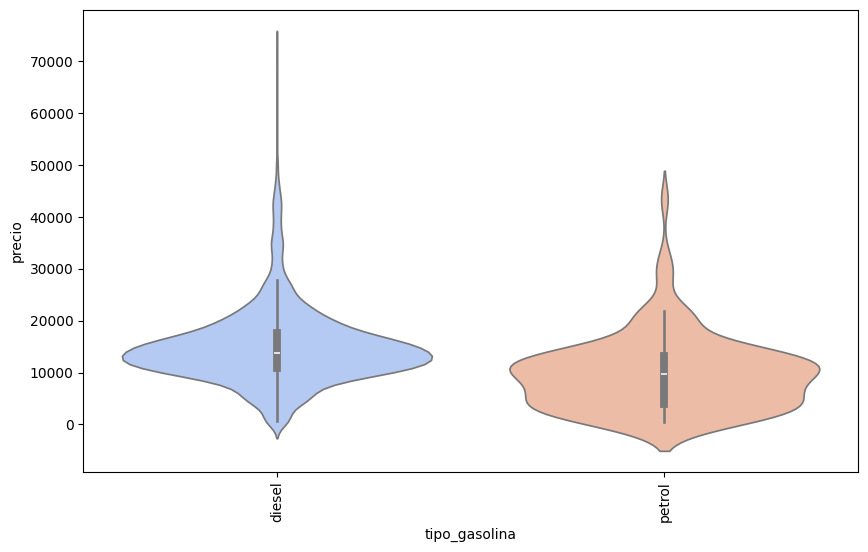

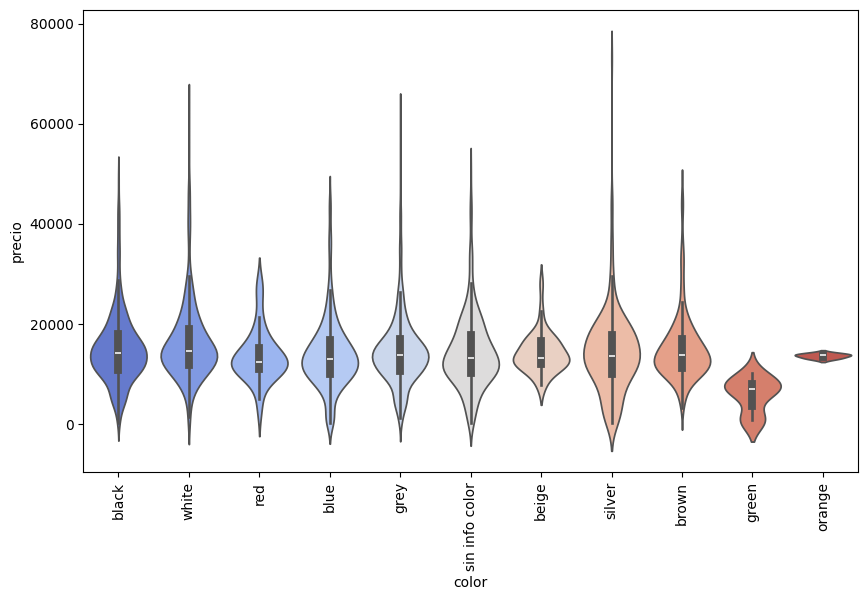

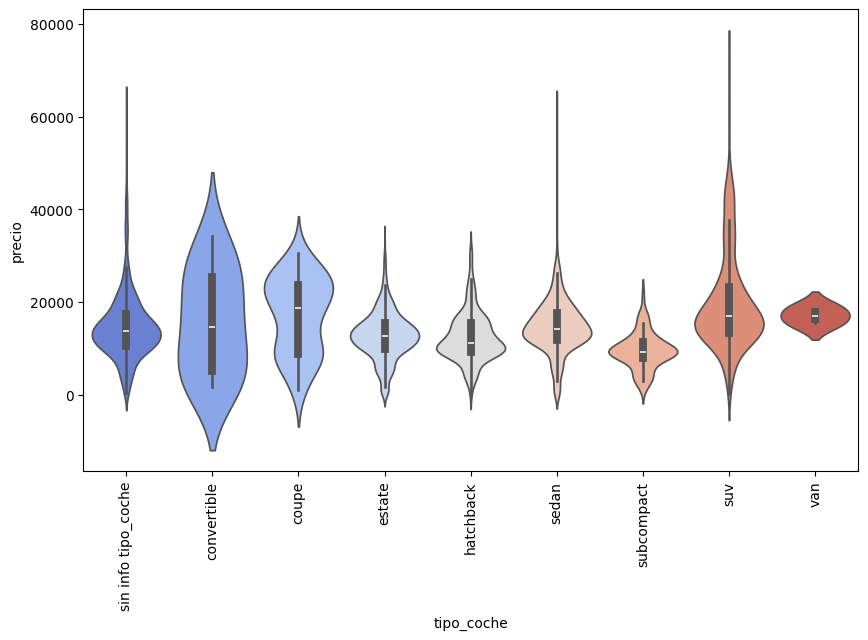

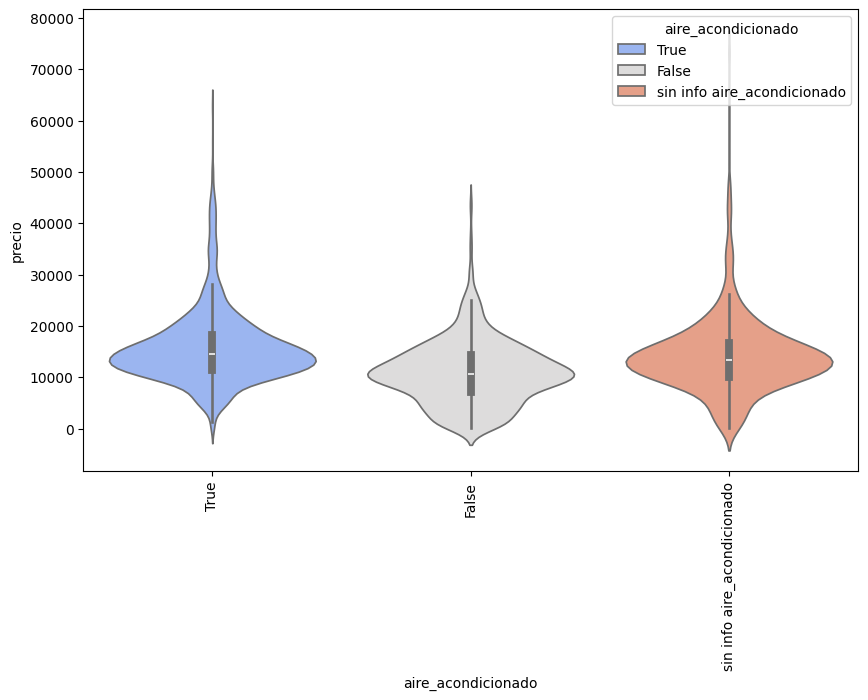

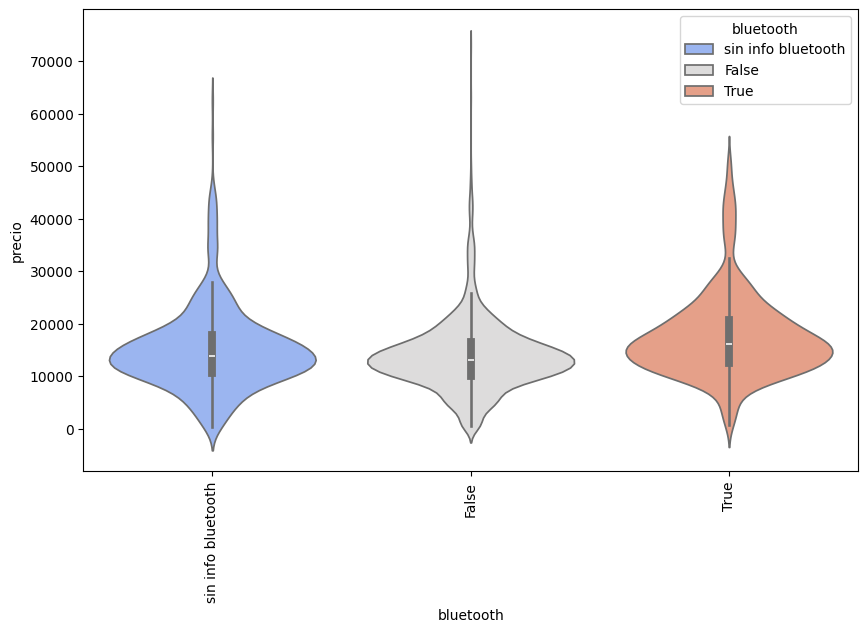

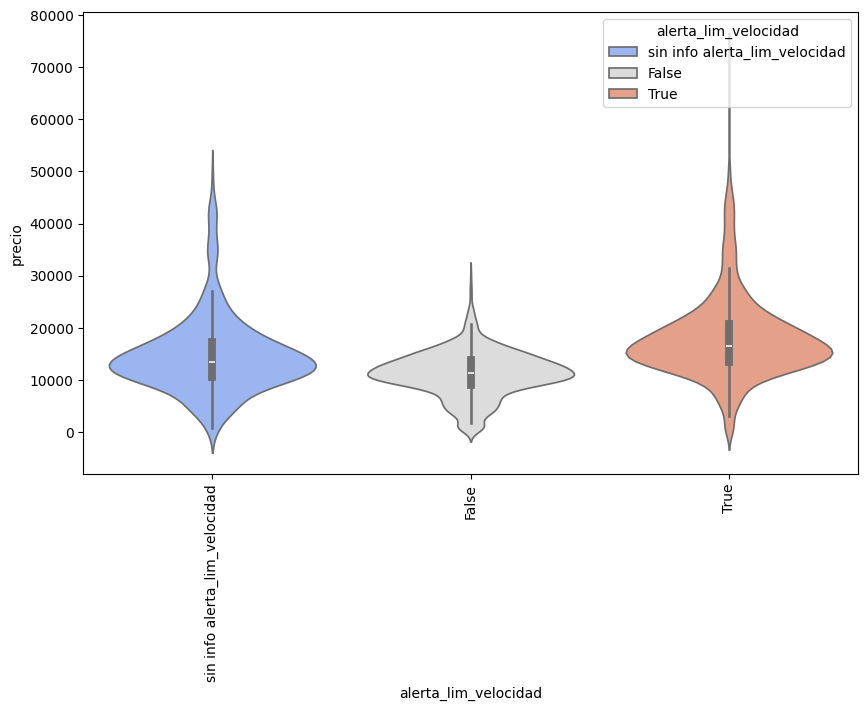

In [979]:
for i in df_bmw9:
  if (df_bmw9[i].dtype.kind =="O"):
    plt.figure(figsize=(10,6))
    sns.violinplot(x=i,y="precio", data=df_bmw9, hue = i, palette = 'coolwarm');
    plt.xticks(rotation=90)

In [980]:
lnum

['km', 'potencia']

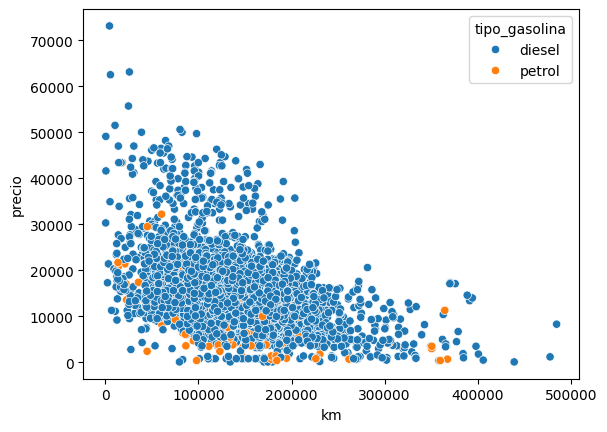

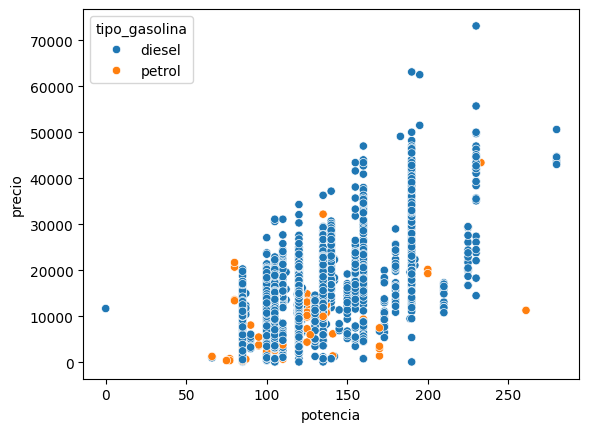

In [981]:
for i in lnum:
  plt.figure()
  sns.scatterplot(x=i,y="precio", data=df_bmw9, hue='tipo_gasolina')

6. Transformación de variables categóricas a numéricas con el get_dumies:
'modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'aire_acondicionado'

In [982]:
lcat2 = ['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'aire_acondicionado', 'bluetooth', 'alerta_lim_velocidad']

In [983]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4319 non-null   object 
 1   km                         4319 non-null   float64
 2   potencia                   4319 non-null   float64
 3   tipo_gasolina              4319 non-null   object 
 4   color                      4319 non-null   object 
 5   tipo_coche                 4319 non-null   object 
 6   aire_acondicionado         4319 non-null   object 
 7   bluetooth                  4319 non-null   object 
 8   alerta_lim_velocidad       4319 non-null   object 
 9   precio                     4319 non-null   float64
 10  volante_regulable_BOOL     4319 non-null   int32  
 11  camara_trasera_BOOL        4319 non-null   int32  
 12  elevalunas_electrico_BOOL  4319 non-null   int32  
 13  gps_BOOL                   4319 non-null   int32

In [984]:
df_bmw_prep = pd.get_dummies(data=df_bmw9, columns = lcat2)

In [985]:
df_bmw_prep.sample(5)

,km,potencia,precio,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL,log_precio,modelo_116,modelo_118,...,tipo_coche_van,aire_acondicionado_False,aire_acondicionado_True,aire_acondicionado_sin info aire_acondicionado,bluetooth_False,bluetooth_True,bluetooth_sin info bluetooth,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_sin info alerta_lim_velocidad
40,48431.0,135.0,27000.0,1,0,1,1,4.431364,False,False,...,False,False,True,False,False,True,False,False,False,True
4014,195070.0,120.0,14800.0,1,0,0,1,4.170262,False,False,...,False,False,True,False,False,False,True,True,False,False
101,146528.0,140.0,18600.0,1,1,0,1,4.269513,False,False,...,False,False,True,False,True,False,False,False,False,True
1743,73628.0,100.0,11700.0,1,0,0,1,4.068186,False,True,...,False,False,True,False,True,False,False,False,True,False
162,117872.0,85.0,10400.0,1,0,0,1,4.017033,False,False,...,False,False,True,False,False,False,True,True,False,False


In [986]:
pd.set_option("display.max_rows",None)

In [987]:
df_bmw_prep.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   km                                                  4319 non-null   float64
 1   potencia                                            4319 non-null   float64
 2   precio                                              4319 non-null   float64
 3   volante_regulable_BOOL                              4319 non-null   int32  
 4   camara_trasera_BOOL                                 4319 non-null   int32  
 5   elevalunas_electrico_BOOL                           4319 non-null   int32  
 6   gps_BOOL                                            4319 non-null   int32  
 7   log_precio                                          4319 non-null   float64
 8   modelo_116                                          4319 non-null   bool   
 9

7. Normalización de las variables numéricas: uso el método minmax

In [988]:
lnum

['km', 'potencia']

In [989]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_bmw_prep[variable_transformar]=minMaxResultado.fit_transform(df_bmw_prep[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [990]:
for i in lnum:
  globals()[f"minMax_{i}"] = minmaxTransformacion(i)

In [991]:
df_bmw_prep.sample(5)

,km,potencia,precio,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL,log_precio,modelo_116,modelo_118,...,tipo_coche_van,aire_acondicionado_False,aire_acondicionado_True,aire_acondicionado_sin info aire_acondicionado,bluetooth_False,bluetooth_True,bluetooth_sin info bluetooth,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_sin info alerta_lim_velocidad
81,0.195403,0.500000,21300.0,0,0,0,0,4.328380,False,False,...,False,True,False,False,True,False,False,False,True,False
2342,0.328879,0.428571,12000.0,0,0,0,1,4.079181,False,False,...,False,False,True,False,True,False,False,False,False,True
3703,0.052578,0.678571,63100.0,1,0,0,1,4.800029,False,False,...,False,False,True,False,True,False,False,False,True,False
1577,0.543065,0.464286,6900.0,1,0,1,1,3.838849,False,False,...,False,False,True,False,True,False,False,False,True,False
3990,0.181301,0.482143,18300.0,1,1,1,1,4.262451,False,False,...,False,False,True,False,False,True,False,False,True,False


In [992]:
df_bmw_prep.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   km                                                  4319 non-null   float64
 1   potencia                                            4319 non-null   float64
 2   precio                                              4319 non-null   float64
 3   volante_regulable_BOOL                              4319 non-null   int32  
 4   camara_trasera_BOOL                                 4319 non-null   int32  
 5   elevalunas_electrico_BOOL                           4319 non-null   int32  
 6   gps_BOOL                                            4319 non-null   int32  
 7   log_precio                                          4319 non-null   float64
 8   modelo_116                                          4319 non-null   bool   
 9

In [993]:
lnum_prep, lbool_prep, lcat_prep = obtener_lista_variables(df_bmw_prep)

In [994]:
lbool_prep

['volante_regulable_BOOL',
 'camara_trasera_BOOL',
 'elevalunas_electrico_BOOL',
 'gps_BOOL',
 'modelo_116',
 'modelo_118',
 'modelo_316',
 'modelo_318',
 'modelo_320',
 'modelo_420',
 'modelo_518',
 'modelo_520',
 'modelo_525',
 'modelo_530',
 'modelo_X1',
 'modelo_X3',
 'modelo_X5',
 'tipo_gasolina_diesel',
 'tipo_gasolina_petrol',
 'color_beige',
 'color_black',
 'color_blue',
 'color_brown',
 'color_green',
 'color_grey',
 'color_orange',
 'color_red',
 'color_silver',
 'color_sin info color',
 'color_white',
 'tipo_coche_convertible',
 'tipo_coche_coupe',
 'tipo_coche_estate',
 'tipo_coche_hatchback',
 'tipo_coche_sedan',
 'tipo_coche_sin info tipo_coche',
 'tipo_coche_subcompact',
 'tipo_coche_suv',
 'tipo_coche_van',
 'aire_acondicionado_False',
 'aire_acondicionado_True',
 'aire_acondicionado_sin info aire_acondicionado',
 'bluetooth_False',
 'bluetooth_True',
 'bluetooth_sin info bluetooth',
 'alerta_lim_velocidad_False',
 'alerta_lim_velocidad_True',
 'alerta_lim_velocidad_si

In [995]:
for i in lbool_prep:
    df_bmw_prep[i] = df_bmw_prep[i].astype(int)

In [996]:
df_bmw_prep.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   km                                                  4319 non-null   float64
 1   potencia                                            4319 non-null   float64
 2   precio                                              4319 non-null   float64
 3   volante_regulable_BOOL                              4319 non-null   int32  
 4   camara_trasera_BOOL                                 4319 non-null   int32  
 5   elevalunas_electrico_BOOL                           4319 non-null   int32  
 6   gps_BOOL                                            4319 non-null   int32  
 7   log_precio                                          4319 non-null   float64
 8   modelo_116                                          4319 non-null   int32  
 9

8. Análisis correlación final

In [997]:
corr = df_bmw_prep.corr()

In [998]:
#La idea es quedarte con el triangulo superior, por eso luego se pone el resto a nulos
corr2=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [999]:
#Stack sirve para hacer una transpuesta a una columna
corr2.stack()

km                                              potencia                                              0.000095
                                                precio                                               -0.422075
                                                volante_regulable_BOOL                                0.076450
                                                camara_trasera_BOOL                                   0.012703
                                                elevalunas_electrico_BOOL                             0.038575
                                                gps_BOOL                                              0.161699
                                                log_precio                                           -0.426421
                                                modelo_116                                           -0.135289
                                                modelo_118                                           -0.041966
 

In [1000]:
#borramos nulos
corr3=corr2.unstack().dropna()

In [1001]:
corr4 = corr3.sort_values()

In [1002]:
pd.set_option("display.max_rows",None)

In [1003]:
corr4

tipo_gasolina_petrol                                tipo_gasolina_diesel                             -1.000000
aire_acondicionado_True                             aire_acondicionado_False                         -0.761394
alerta_lim_velocidad_True                           alerta_lim_velocidad_False                       -0.735700
bluetooth_True                                      bluetooth_False                                  -0.674638
bluetooth_sin info bluetooth                        bluetooth_False                                  -0.585505
aire_acondicionado_sin info aire_acondicionado      aire_acondicionado_True                          -0.519625
alerta_lim_velocidad_False                          potencia                                         -0.432357
log_precio                                          km                                               -0.426421
precio                                              km                                               -0.422075
a

In [1004]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,precio,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL,log_precio,modelo_116,modelo_118,modelo_316,modelo_318,modelo_320,modelo_420,modelo_518,modelo_520,modelo_525,modelo_530,modelo_X1,modelo_X3,modelo_X5,tipo_gasolina_diesel,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_sin info color,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin info tipo_coche,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,aire_acondicionado_False,aire_acondicionado_True,aire_acondicionado_sin info aire_acondicionado,bluetooth_False,bluetooth_True,bluetooth_sin info bluetooth,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_sin info alerta_lim_velocidad
km,1.000000,0.000095,-0.422075,0.076450,0.012703,0.038575,0.161699,-0.426421,-0.135289,-0.041966,-0.007123,0.044224,0.075656,-0.139631,0.026139,0.080783,0.098436,0.081351,-0.078330,-0.054733,-0.057476,-0.006611,0.006611,-0.006699,0.032461,-0.016224,-0.031014,0.031102,0.027508,-0.021978,-0.012994,0.024767,0.002521,-0.064094,-0.009661,-0.039982,0.123819,-0.104439,0.060552,-0.005715,-0.030332,-0.092170,-0.014475,-0.023616,0.006941,0.020553,0.009442,-0.023664,0.013466,0.032783,-0.016387,-0.022217
potencia,0.000095,1.000000,0.643059,0.304632,0.279744,0.365118,-0.011728,0.468210,-0.367813,-0.116754,-0.295061,-0.297833,0.059441,0.041519,-0.080804,0.062256,0.190490,0.421826,-0.109701,0.125333,0.528122,0.009897,-0.009897,-0.022526,0.045250,-0.011037,-0.040967,-0.031808,0.002993,-0.008219,-0.021735,0.016119,-0.009478,-0.011440,-0.005748,0.013689,-0.001081,-0.221802,-0.013519,-0.013055,-0.147086,0.262052,0.008427,-0.188482,0.168847,-0.008764,-0.151509,0.155101,0.030626,-0.432357,0.439947,-0.016327
precio,-0.422075,0.643059,1.000000,0.260032,0.223860,0.322545,-0.007409,0.834212,-0.208045,-0.126298,-0.142257,-0.183035,-0.135628,0.171683,0.029555,0.064292,0.018871,0.145138,-0.072615,0.139433,0.540341,0.115567,-0.115567,-0.006555,0.026047,-0.045616,0.014854,-0.061006,-0.017925,-0.004101,-0.014117,-0.017522,-0.015609,0.071011,0.005902,0.032903,-0.150919,-0.103130,-0.003312,-0.009195,-0.091626,0.299802,0.006893,-0.246503,0.231514,-0.027744,-0.169869,0.187173,0.019756,-0.400276,0.396827,-0.000637
volante_regulable_BOOL,0.076450,0.304632,0.260032,1.000000,0.242233,0.263482,0.232901,0.221720,-0.193626,-0.120699,-0.128770,-0.099182,-0.083219,0.036163,0.071710,0.210218,0.107093,0.120220,-0.094159,0.071648,0.170952,0.035995,-0.035995,-0.026517,0.011882,0.016644,0.047472,0.001473,0.057275,0.007172,-0.037793,-0.007874,-0.028538,-0.105013,0.040802,0.008542,0.018897,-0.117517,0.048433,-0.022385,-0.086455,0.074580,-0.001333,-0.279666,0.255873,-0.021138,-0.098560,0.117890,0.001261,-0.163300,0.169003,-0.010087
camara_trasera_BOOL,0.012703,0.279744,0.223860,0.242233,1.000000,0.185656,0.059328,0.156138,-0.098534,-0.029948,-0.080965,-0.092087,-0.045260,0.001452,0.009571,0.036583,0.073985,0.112715,-0.017194,0.036719,0.186546,-0.005409,0.005409,-0.021730,0.022038,0.008657,-0.011343,-0.000083,0.014200,-0.012455,-0.026082,0.008981,-0.040323,-0.006618,-0.024935,-0.020640,-0.026448,-0.022591,-0.030746,0.004158,-0.042215,0.100657,-0.010168,-0.127800,0.098391,0.018572,-0.109052,0.116771,0.016406,-0.143512,0.150407,-0.011467
elevalunas_electrico_BOOL,0.038575,0.365118,0.322545,0.263482,0.185656,1.000000,0.189107,0.324948,-0.172494,-0.094316,-0.153716,-0.152657,0.025736,0.112994,0.108925,0.152006,0.102362,0.147100,-0.098913,0.029818,0.116005,0.015519,-0.015519,-0.016381,0.073826,-0.032793,-0.017543,-0.035940,-0.016299,0.011798,-0.021321,-0.038245,-0.011924,0.019347,0.023620,0.069209,0.055993,-0.078847,0.002458,-0.008864,-0.097280,0.019598,0.002412,-0.254176,0.233406,-0.020513,-0.204366,0.233657,0.014462,-0.294209,0.295949,-0.006378
gps_BOOL,0.161699,-0.011728,-0.007409,0.232901,0.059328,0.189107,1.000000,0.038568,0.0